#     **        Electric Vehicle Data Analysis and Statistics       **
<!-- This collection of code snippets performs various analyses on the dataset of Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) registered through the Washington State Department of Licensing. The codes generate insights such as statistics on electric range by city, counts of CAFV eligibility, popularity of electric vehicle manufacturers, range statistics (max, min, average), distribution of electric vehicle types, adoption trends by model year, and adoption by county. The results are saved in CSV files and visualized through bar charts, line charts, and pie charts. These analyses provide valuable insights into the electric vehicle landscape and adoption patterns in Washington State. -->


In [35]:
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sea 

op = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Python File\E.V Data.csv" , encoding="unicode_escape")

# Count of Electric Vehicles by County :
This code counts the number of electric vehicles in the dataset for each county. The counts are then saved to a CSV file named "count_by_county.csv".


In [36]:
count_country = op["County"].value_counts()
print(count_country)

County
King           105237
Snohomish       24721
Pierce          16197
Clark           12231
Thurston         7526
                ...  
Maui                1
Plaquemines         1
Burlington          1
Mobile              1
Christian           1
Name: count, Length: 205, dtype: int64


In [37]:
count_city = op["City"].value_counts()
print(count_city)

City
Seattle                    33328
Bellevue                   10235
Redmond                     7341
Vancouver                   7286
Bothell                     6769
                           ...  
Peoria                         1
Winterville                    1
Sarasota                       1
Aberdeen Proving Ground        1
Wishram                        1
Name: count, Length: 770, dtype: int64


In [38]:
colors = sea.color_palette("Paired",len(count_country))
colores = sea.color_palette("Paired",len(count_city))
top_10_country = count_country.nlargest(10)
top_10_city = count_city.nlargest(10)



# Bar Chart of Electric Vehicle Adoption by Country :
This code creates a bar chart showing the adoption of electric vehicles in each county. Each bar represents a county, and the height of the bar represents the count of electric vehicles in that country. The x-axis is labeled as "Country", the y-axis is labeled as "Count", and the chart title is "Electric Vehicle Adoption by Country".

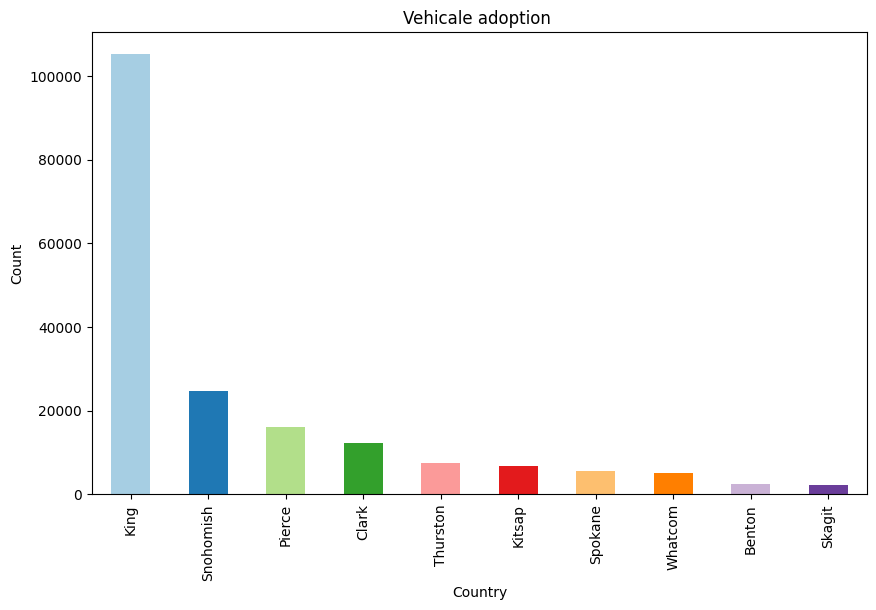

In [39]:
plt.figure(figsize = (10,6))
top_10_country.plot(kind="bar",color=colors)
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Vehicale adoption ")
plt.show()


# Horizontal Bar Chart for Electric Vehicle Adoption by City :
This code creates a bar chart showing the adoption of electric vehicles in each city. Each bar represents a city, and the height of the bar represents the count of electric vehicles in that city. The x-axis is labeled as "City", the y-axis is labeled as "Count", and the chart title is "Electric Vehicle Adoption by County".

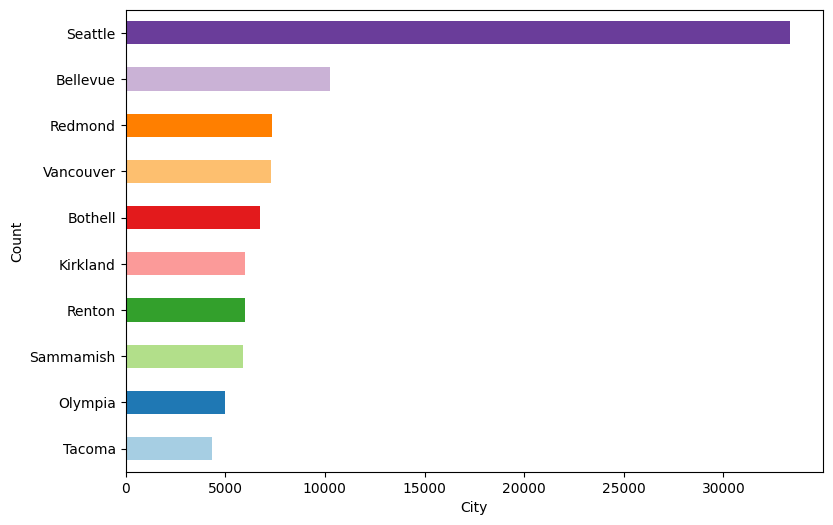

In [40]:
plt.figure(figsize= (9,6))
top_10_city.sort_values(ascending=True).plot(kind="barh", color= colores)
plt.xlabel("City")
plt.ylabel("Count")
plt.show()


# Count of Electric Vehicles by Model Year :
This code counts the number of electric vehicles in the dataset for each model year. The counts are sorted in ascending order based on the model year.

In [41]:
count_by_year = op["Model Year"].value_counts().sort_index()
count_by_year

Model Year
1997        1
1999        4
2000        7
2002        2
2003        1
2008       22
2010       24
2011      707
2012     1549
2013     4331
2014     3507
2015     4741
2016     5474
2017     8662
2018    14386
2019    10872
2020    12241
2021    19837
2022    28465
2023    60161
2024    30030
2025      415
Name: count, dtype: int64

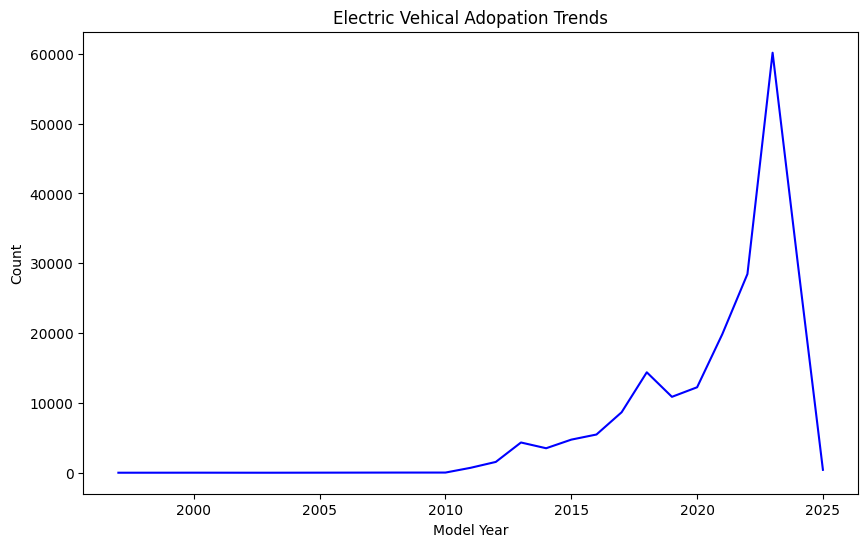

In [42]:
plt.figure(figsize= (10,6)) 
count_by_year.plot(kind='line',color = "blue")
plt.xlabel("Model Year")
plt.ylabel("Count")
plt.title("Electric Vehical Adopation Trends")
plt.show()

# Count of Electric Vehicle Types :
This code counts the occurrences of each electric vehicle type in the dataset.

In [76]:
Count_by_vehicle = op["E.V_Type"].value_counts()
print(Count_by_vehicle)


E.V_Type
BEV     161539
PHEV     43900
Name: count, dtype: int64


# Pie Chart of Electric Vehicle Types Distribution :
This code creates a pie chart displaying the distribution of different types of electric vehicles. Each slice of the pie represents a specific vehicle type, and the percentage of each type is shown on the chart. The title of the chart is "Distribution of Electric Vehicle Types".

<function matplotlib.pyplot.show(close=None, block=None)>

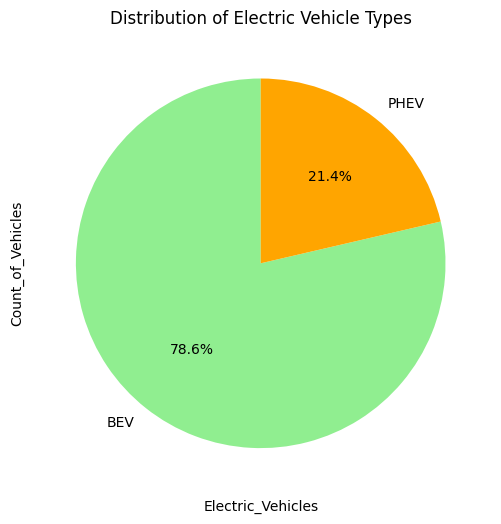

In [77]:
# Pie Chart 
plt.figure(figsize=(6,6))
col = ["lightgreen","orange"]
Count_by_vehicle.plot(kind="pie", colors= col, autopct= "%2.1f%%" , startangle = 90)
plt.xlabel("Electric_Vehicles")
plt.ylabel("Count_of_Vehicles")
plt.title("Distribution of Electric Vehicle Types")
plt.show

# Electric Vehicle Range Statistics :
This code calculates the maximum, minimum, and average electric ranges of the vehicles in the dataset. The statistics.

In [78]:
# Range Statistics
max_range = op["Electric Range"].max()
min_range = op["Electric Range"].min()
Average_range = op["Electric Range"].mean()

Vehicle_range = pd.DataFrame({
"Max_range" : [max_range],
"Min_range" : [min_range],
"Average_range" : [Average_range]

})

Vehicle_range


,Max_range,Min_range,Average_range
0,337.0,0.0,52.164342


# Top 5 Popular Electric Vehicle Manufacturers :
This code counts the occurrences of each electric vehicle manufacturer in the dataset and selects the top 5 manufacturers with the highest counts. 

In [79]:
# Total_counts of makes
count_of_makes = op["Make"].value_counts().head(10)
color_make = sea.color_palette("Paired", len(count_of_makes) )


# Bar Chart of Popular Electric Vehicle Manufacturers :
This code creates a bar chart showing the count of electric vehicles by popular manufacturers. The chart is displayed with the x-axis labeled as "Make" representing the manufacturers and the y-axis labeled as "Count" representing the number of vehicles. The title of the chart is "Popular Electric Vehicle Manufacturers."

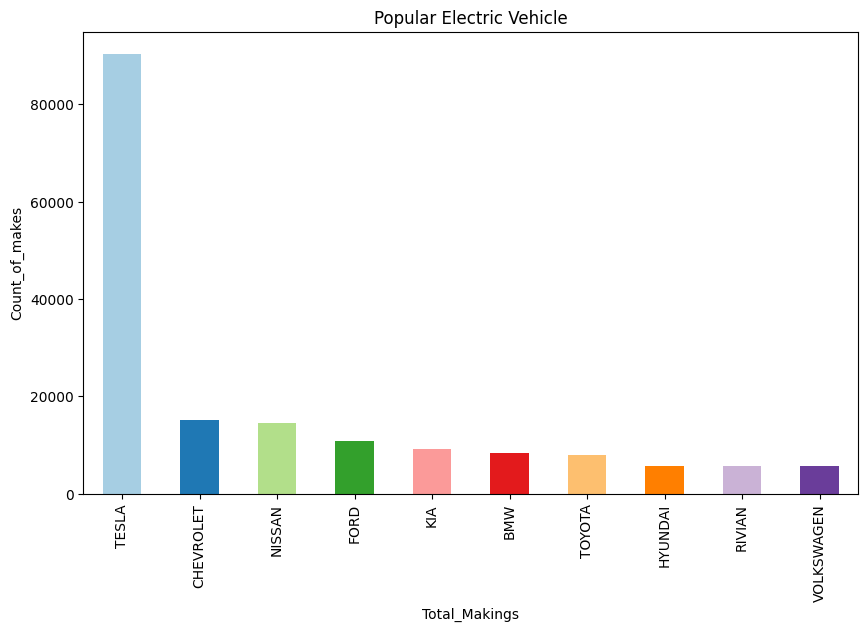

In [80]:
plt.figure(figsize=(10,6))
count_of_makes.plot(kind= "bar", color = color_make)
plt.xlabel("Total_Makings")
plt.ylabel("Count_of_makes")
plt.title("Popular Electric Vehicle")
plt.show()

# Count of CAFV Eligibility :
This code counts the number of vehicles eligible for the Clean Alternative Fuel Vehicle (CAFV) program and saves the count to a CSV file named "cafvs.csv".

In [81]:
count_of_cafv = op["CAFV"].value_counts()
count_of_cafv

CAFV
unknown         114172
known            70016
not eligible     21251
Name: count, dtype: int64

# Doughnut Chart of Clean Alternative Fuel Vehicle  :
This code creates a Doughnut chart displaying the CAFV vehicles these chart want to see where it is CAFV vehicle or not to 
get report of known or unknown and not eligble for it .


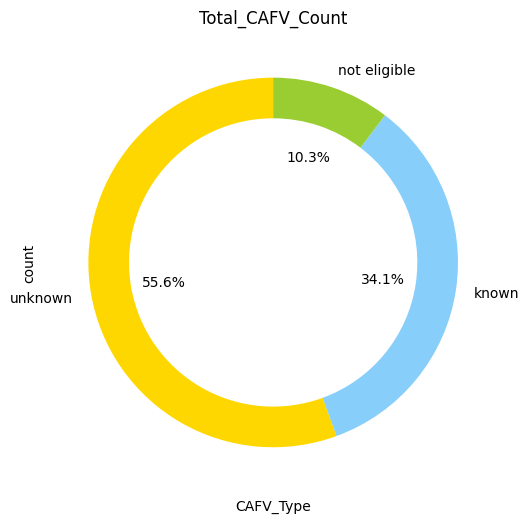

In [82]:
plt.figure(figsize=(6,6))

colors = ['gold', 'lightskyblue', 'yellowgreen']
count_of_cafv.plot(kind= "pie", autopct = "%2.1f%%",startangle = 90,colors = colors,wedgeprops={'width': 0.22})
plt.xlabel("CAFV_Type")

plt.title("Total_CAFV_Count")
plt.show()

# Analysis of Electric Range by City :
This code groups the data by city and calculates the Total electric range for each city. 

In [91]:
groupby_cities = op.groupby("City")
city_state = groupby_cities["Electric Range"].sum().nlargest(5)



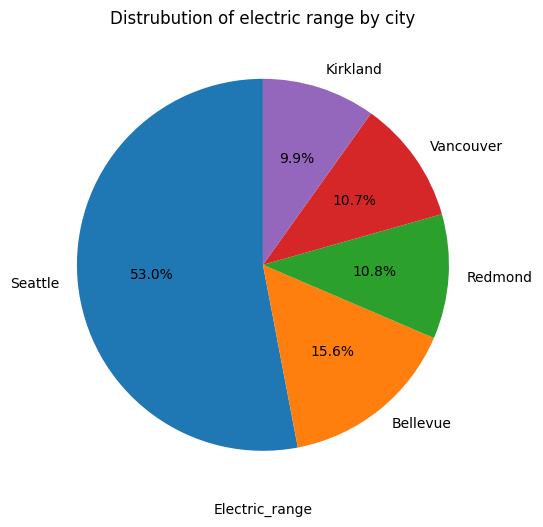

In [99]:
# pie chart 
plt.figure(figsize= (6,7))
city_state.plot(kind = "pie",autopct = "%2.1f%%",startangle = 90)
plt.xlabel("Electric_range")
plt.ylabel("  ")
plt.title("Distrubution of electric range by city")
plt.show()

# Analysis of Electric Range by Brands :
These chart shows us that every brand of car electric range and there capbilities in it for every make.


In [106]:
group_make = op.groupby("Make")
total_makings = group_make["Electric Range"].sum().nlargest(10).sort_values(ascending=True)
color_makes = sea.color_palette("Paired",len(total_makings))

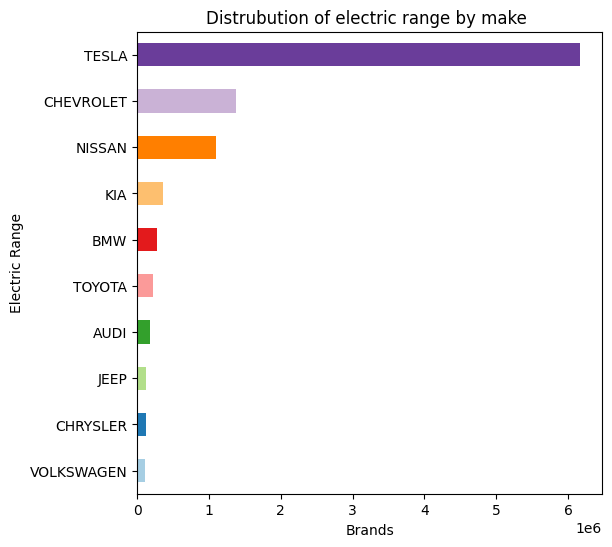

In [109]:
plt.figure(figsize=(6,6))
total_makings.plot(kind="barh",color = color_makes)
plt.xlabel("Brands")
plt.ylabel("Electric Range")
plt.title("Distrubution of electric range by make ")
plt.show()

In [129]:
op

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,E.V_Type,CAFV,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023,TOYOTA,RAV4 PRIME,PHEV,known,42.0,0.0,35.0,240684006,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018,NISSAN,LEAF,BEV,known,151.0,0.0,35.0,474183811,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020,TESLA,MODEL 3,BEV,known,266.0,0.0,43.0,113120017,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014,NISSAN,LEAF,BEV,known,84.0,0.0,46.0,108188713,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017,CHEVROLET,BOLT EV,BEV,known,238.0,0.0,20.0,176448940,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205434,1N4BZ1CV2N,Chelan,Peshastin,WA,98847.0,2022,NISSAN,LEAF,BEV,unknown,0.0,0.0,12.0,187384494,POINT (-120.6051696 47.5510173),PUD NO 1 OF CHELAN COUNTY,5.300796e+10
205435,1FTVW1EV0P,Snohomish,Everett,WA,98208.0,2023,FORD,F-150,BEV,unknown,0.0,0.0,44.0,255036386,POINT (-122.2032349 47.8956271),PUGET SOUND ENERGY INC,5.306104e+10
205436,5YJXCDE22H,Spokane,Cheney,WA,99004.0,2017,TESLA,MODEL X,BEV,known,200.0,0.0,6.0,221631588,POINT (-117.5836098 47.4951312),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10
205437,5YJ3E1EA3J,King,Vashon,WA,98070.0,2018,TESLA,MODEL 3,BEV,known,215.0,0.0,34.0,336983496,POINT (-122.466938 47.429244),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
